In [2]:
%load_ext autoreload
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.append('/Users/luke/Git/xarray_tools/')
import xarray_tools as xt
import xarray as xr

/Users/luke/Dev/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'title'
  s)


AttributeError: 'QuadContourSet' object has no attribute 'set_title'

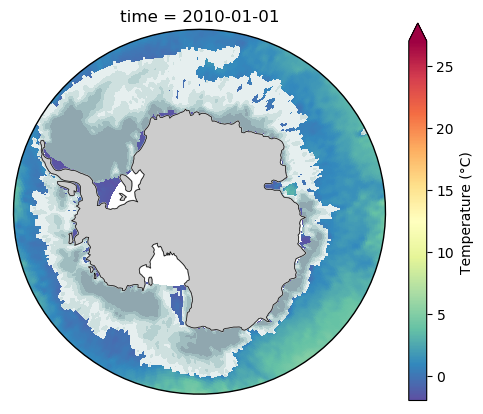

In [8]:
xds = xr.open_dataset('/Users/luke/GoogleDrive/Data/Observations/ghrsst/GHRSST-AVHRR_OI-L4LRblend-GLOB-16D_25km_2010.nc')

from cartopy import crs, feature
fig, ax = subplots(1, 1, dpi=100, figsize=[6, 5], subplot_kw={'projection': crs.Stereographic(central_latitude=-90, scale_factor=6)})
ax = (xds.analysed_sst[0] - 273.15).plot(cmap=cm.Spectral_r, vmin=-2, vmax=27, **xt.create_cartopy_axes(ax=ax, round=True))

ax.colorbar.set_label('Temperature (°C)')
ax1 = (xds.sea_ice_fraction[0]).plot.contourf(cmap=cm.bone_r, add_colorbar=False, levels=mgrid[-0.1:3:0.2], **xt.create_cartopy_axes(ax=ax.axes, round=True))
ax.axes.set

xx, yy = mgrid[-180:180, -90:-10]
props = dict(transform=crs.PlateCarree(), colors='k', linewidths=0.3, linestyles='-', zorder=5, alpha=0.4)
lats = contour(xx, yy, yy, levels=[-60, -40], **props)
lons = contour(xx, yy, xx, levels=mgrid[-179.9:181:60], **props)